# Lecture 6: More About Filters
Audio Processing, MED4, Aalborg University, 2019

By Jesper Kjær Nielsen (jkn@create.aau.dk), Audio Analysis Lab, Aalborg University.

Last edited: 2019-04-02

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-generalised-phasor-and-correlation" data-toc-modified-id="A-generalised-phasor-and-correlation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A generalised phasor and correlation</a></span><ul class="toc-item"><li><span><a href="#A-generalised-phasor" data-toc-modified-id="A-generalised-phasor-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A generalised phasor</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#The-Z-transform" data-toc-modified-id="The-Z-transform-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Z-transform</a></span><ul class="toc-item"><li><span><a href="#The-definition-of-the-Z-transform" data-toc-modified-id="The-definition-of-the-Z-transform-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The definition of the Z-transform</a></span></li><li><span><a href="#The-transfer-function" data-toc-modified-id="The-transfer-function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The transfer function</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Poles-and-zeros" data-toc-modified-id="Poles-and-zeros-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Poles and zeros</a></span><ul class="toc-item"><li><span><a href="#Poles-and-zeros" data-toc-modified-id="Poles-and-zeros-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Poles and zeros</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Filter-properties-and-types" data-toc-modified-id="Filter-properties-and-types-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Filter properties and types</a></span><ul class="toc-item"><li><span><a href="#Linearity-of-filters" data-toc-modified-id="Linearity-of-filters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linearity of filters</a></span></li><li><span><a href="#Filters-in-series" data-toc-modified-id="Filters-in-series-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Filters in series</a></span></li><li><span><a href="#Filters-in-parallel" data-toc-modified-id="Filters-in-parallel-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Filters in parallel</a></span></li><li><span><a href="#Basic-filter-types" data-toc-modified-id="Basic-filter-types-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Basic filter types</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## A generalised phasor and correlation
In the next 20 minutes, you will learn
- what the behaviour of the signal (a generalised phasor)
$$
    z^{n} = r^{n}\mathrm{e}^{j\omega n}
$$
is
- what correlation is
- how the simililarity between signals can be measured using correlation


### A generalised phasor
In the first lecture, we saw that a **complex-number** $z$ can be written as
$$
    z = a+jb = r\mathrm{e}^{j\omega}
$$
where $a$, $b$, $r$, and $\omega$ are the **real part**, the **imaginary part**, the **magnitude**, and the **phase** of $z$.

<center>
<img src="figures/ap1ComplexPlaneSketchB.png" alt="Complex plane" width="80%"/>
</center>

A very important signal is a complex number raised to **minus** the sampling index, i.e., 
$$
    z^{-n} = \left(r\mathrm{e}^{j\omega}\right)^{-n} = r^{-n}\mathrm{e}^{-j\omega n}
$$
which simplifies to a **phasor** for $r=1$. Thus, we can refer to $z^{-n}$ as a **generalised phasor**.

From Euler's formula, we can also have
\begin{align}
    z^{-n} &= r^{-n}\left[\cos(\omega n)-j\sin(\omega n)\right]\\
    &= r^{-n}\cos(\omega n)-jr^{n}\sin(\omega n)\ .
\end{align}

#### Examples of $z^{-n}$ for different values of $z$
Recall thath $z^{-n}$ is defined as
$$
    z^{-n} = r^{-n}\mathrm{e}^{-j\omega n}\ .
$$

Thus, $z^{-n}$ is a product of the two signals $r^{-n}$ and $\mathrm{e}^{-j\omega n}$ where the latter can also be written as (from Euler's formula)
$$
    \mathrm{e}^{-j\omega n} = \cos(\omega n)-j\sin(\omega n)\ .
$$

Let us see how these two signals behave for different values of $r$ and $\omega$.

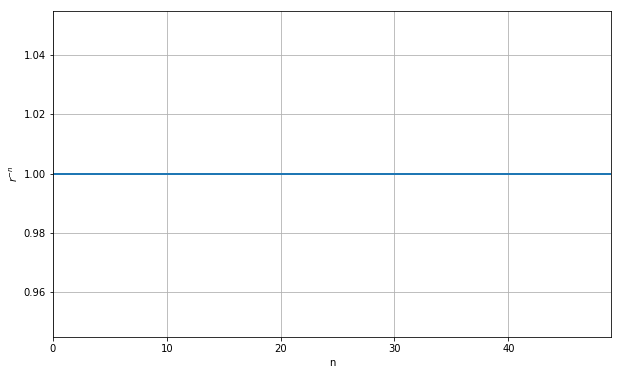

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
nData = 50
samplingIndices = np.arange(nData)
magnitude = 1. # any nonnegative number
plt.figure(figsize=(10,6))
plt.plot(samplingIndices, magnitude**(-samplingIndices), linewidth=2), plt.grid(True)
plt.xlim((samplingIndices[0],samplingIndices[nData-1])), plt.xlabel('n'), plt.ylabel('$r^{-n}$');

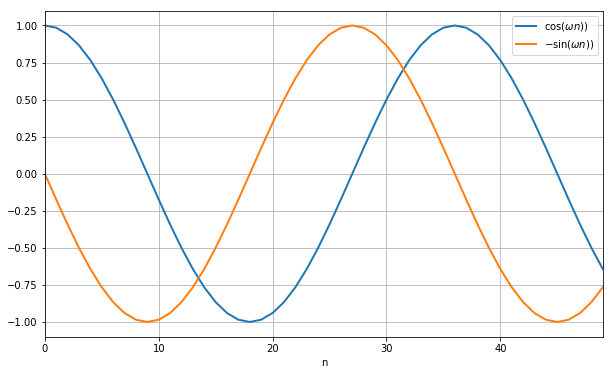

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
nData = 50
samplingIndices = np.arange(nData)
digitalFreq = 10*np.pi/180 # radians/sample
phasor = np.exp(-1j*digitalFreq*samplingIndices)
plt.figure(figsize=(10,6))
plt.plot(samplingIndices, np.real(phasor), linewidth=2, label='$\cos(\omega n)$)')
plt.plot(samplingIndices, np.imag(phasor), linewidth=2, label='$-\sin(\omega n)$)'), plt.grid(True)
plt.xlim((samplingIndices[0],samplingIndices[nData-1])), plt.xlabel('n'), plt.legend();

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def computeGenPhasor(complexNumber, samplingIndices):
    '''Compute the signal samples of a generalised phasor'''
    genPhasor = complexNumber**(-samplingIndices)
    nData = np.size(samplingIndices)
    overSamplingFactor = 50
    overSamplingIndices = np.arange(nData*overSamplingFactor)/overSamplingFactor
    overSampledGenPhasor = complexNumber**(-overSamplingIndices)
    return genPhasor, overSampledGenPhasor, overSamplingIndices

nData = 35
samplingIndices = np.arange(nData)

unitCircle = np.exp(1j*2*np.pi*np.arange(1000)/1000)

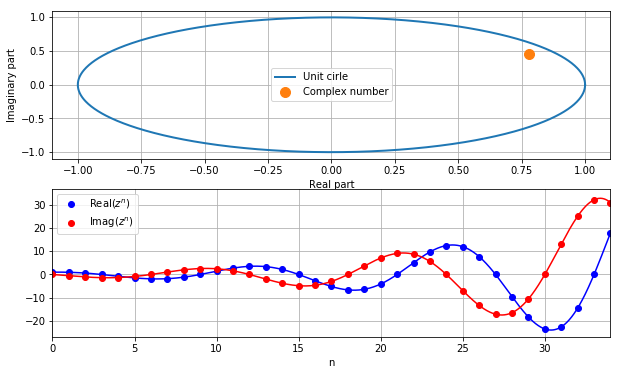

In [16]:
magnitude = 0.9 # any nonnegative number
digitalFreq = 30*np.pi/180 # radians/sample
complexNumber = magnitude*np.exp(1j*digitalFreq)
genPhasor, overSampledGenPhasor, overSamplingIndices = computeGenPhasor(complexNumber, samplingIndices)

plt.figure(figsize=(10,6)), plt.subplot(2,1,1)
plt.plot(np.real(unitCircle), np.imag(unitCircle), linewidth=2, label='Unit cirle')
plt.plot(np.real(complexNumber), np.imag(complexNumber),'o', markersize=10, label='Complex number'), plt.grid(True)
plt.xlabel('Real part'), plt.ylabel('Imaginary part'), plt.legend(), plt.subplot(2,1,2)
plt.plot(overSamplingIndices, np.real(overSampledGenPhasor), 'b')
plt.plot(samplingIndices, np.real(genPhasor), 'bo', label='Real($z^{n}$)')
plt.plot(overSamplingIndices, np.imag(overSampledGenPhasor), 'r')
plt.plot(samplingIndices, np.imag(genPhasor), 'ro', label='Imag($z^{n}$)')
plt.xlim((samplingIndices[0],samplingIndices[nData-1])), plt.grid(True), plt.xlabel('n'), plt.legend();

### Correlation
How do you rank the signals in terms of similarity to $x_n$?
<center>
<img src="figures/ap6CorrelatedSignals.png" alt="Correlated signals" width="80%"/>
</center>

We can make a ompute compute the correlation between two signals $x_n$ and $y_n$ as
$$
    c_m = \sum_{n=-\infty}^\infty x_ny_{n+m}\ .
$$
This is called the **cross-correlation function** and useful in many audio applications such as
- time-difference of arrival (TDOA) estimation (to estimate the direction of a source using a microphone array)
- pitch/fundamental frequency estimation (lecture 12)
- **interpretation** of the Z-transform and Fourier transform (lecture 7)

An important special case of the cross-correlation function is for zero lag (i.e., $m=0$) where we obtain
$$
    c_0 = \sum_{n=-\infty}^\infty x_ny_{n}\ .
$$
Thus, we here **multiply** two functions and then **sum** the computed product.

#### Example: correlation of two simple signals
Consider the two signals
\begin{align}
    x_n &= 1\delta_n -2\delta_{n-1}+0.5\delta_{n-2}-1\delta_{n-3}\\
    y_n &= 1
\end{align}
where $\delta_n$ is our well-known **impulse** which is zero for all $n$ except for $n=0$ where it is 1.
<center>
<img src="figures/ap6CorrelationExample.png" alt="Example of correlation" width="80%"/>
</center>

To compute the correlation $c_0$ between these two signals, we first compute their product which is
$$
    x_ny_n = 1\delta_n -2\delta_{n-1}+0.5\delta_{n-2}-1\delta_{n-3}\ .
$$

Finally, we sum the product of these two signals and obtain
$$
    c_0 = \sum_{n=-\infty}^\infty x_ny_{n} = \sum_{n=0}^3 x_ny_{n} = -1.5\ .
$$

#### Example: correlation of a signal with a phasor
Let us consider the phasor
$$
    f_n = \mathrm{e}^{-j\omega n}
$$
and correlate that with a signal $x_n$. The cross-correlation $c_0$ is now
$$
    c_0 = \sum_{n=-\infty}^\infty x_n f_n = \sum_{n=-\infty}^\infty x_n \mathrm{e}^{-j\omega n}\ .
$$

When viewed as a **function of $\omega$**, this correlation is typically denoted $c_0 = H(\omega)$ and called the **discrete-time Fourier transform** (DTFT) which we will talk much more about in lecture 7.

Consider the case where the signal is a real-valued sinusoid given by
$$
    x_n = \cos(\omega_0 n)
$$
for $n=0,1,2,\ldots, N-1$.

We wish to compute the correlation $c_0 = H(\omega)$ for different values of $\omega$.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

nData = 100
samplingIndices = np.arange(nData)
signalFreq = 2*np.pi*10/nData # radians/sample
signal = np.cos(signalFreq*samplingIndices)

In [18]:
freqGrid = 2*np.pi*np.arange(nData)/nData
correlation = np.zeros(nData)+1j*np.zeros(nData)
for ii in np.arange(nData):
    phasor = np.exp(-1j*freqGrid[ii]*samplingIndices)
    correlation[ii] = np.sum(signal*phasor)

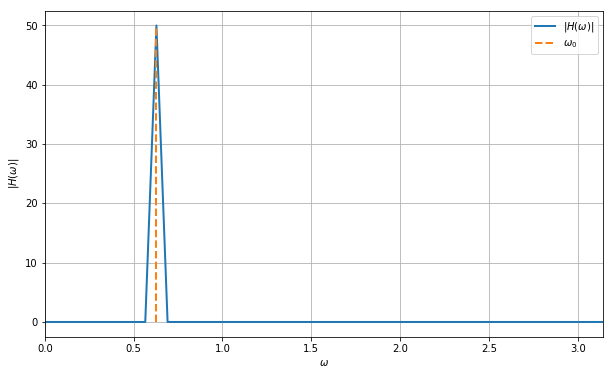

In [19]:
plt.figure(figsize=(10,6))
plt.plot(freqGrid, np.abs(correlation), lineWidth=2, label='$|H(\omega)|$')
plt.plot(np.array([signalFreq,signalFreq]),np.array([0,nData/2]), '--', lineWidth=2, label='$\omega_0$')
plt.grid(True), plt.xlabel('$\omega$'), plt.ylabel('$|H(\omega)|$')
plt.xlim((0,np.pi)), plt.legend();

### Summary
1. We have looked at the generalised phasor
$$
    z^{-n} = r^{-n}\mathrm{e}^{-j\omega n}
$$
which is a product of two function
 1. $r^{-n}$: is either exponentially decaying or increasing in $n$
 2. $\mathrm{e}^{-j\omega n}$ is a phasor
2. We can compute the correlation between two signals as
$$
    c_0 = \sum_{n=-\infty}^\infty x_ny_{n}\ .
$$
The scalar $c_0$ will measure how simililar these two signals are.

### Active 5 minutes break
Consider a the simple filter
$$
    y_n = x_n + ay_{n-1}\ .
$$
1. Is this a feedforward or a feedback filter?
2. Sketch this filter using a multiplication, delay, and summation blocks.
3. Compute the impulse reponse of the filter for $a=0.5$ and $a=2$ by sending and impulse $\delta_n$ through the filter. What do you see?

## The Z-transform
In the next 20 minutes, you will learn
- how the Z-transform is defined
- what a transfer function is
- what the Z-transform is used for

### The definition of the Z-transform
For a general signal $x_n$, the Z-transform is defined as
$$
    X(z) = \mathcal{Z}\left\{x_n\right\} = \sum_{n=-\infty}^\infty x_nz^{-n}\ .
$$
where $z=r\mathrm{e}^{j\omega}$ .

Note that
- the Z-transform is essentially a correlation between the signal $x_n$ and our generalised phasor $z^{-n}$
- the Z-transform is very useful for analysing filters!
- if we set $r=1$, the Z-transform simplifies to the **discrete-time Fourier transform** (much more on this in lecture 7)

We can also write the Z-transform of $x_n$ as
$$
    X(z) = \mathcal{Z}\left\{x_n\right\} = \sum_{n=-\infty}^\infty x_nz^{-n} = \sum_{n=-\infty}^\infty \left[x_nr^{-n}\right]\mathrm{e}^{-j\omega n}\ .
$$

Thus, we can interpret the Z-transform as an operation doing two things:
1. multiply the signal $x_n$ by an exponentially increasing ($0<r<1$), decreasing ($r>1$), or constant ($r=1$) function $r^{-n}$
2. correlated the the weighted signal in 1. by phasors of different frequencies

#### Example: Z-transform of an impulse
<center>
<img src="figures/ap5Impulse.png" alt="An impulse" width="80%"/>
</center>
An impulse is given by
$$
    \delta_n = \begin{cases}
        1 & n=0\\
        0 & \text{otherwise}
    \end{cases}\ .
$$

Therefore, the Z-transform of it is
$$
    \mathcal{Z}\left\{\delta_n\right\} = \sum_{n=-\infty}^{\infty} \delta_n z^{-n} = z^0 = 1\ .
$$

#### Example: Z-transform of a delay
The Z-transform of a delayed signal $x_{n-D}$
$$
    \mathcal{Z}\left\{x_{n-D}\right\} = \sum_{n=-\infty}^\infty x_{n-D} z^{-n}\ .
$$
We now replace $n$ by $m+D$, where $m$ is another sampling index, so that
\begin{align}
    \mathcal{Z}\left\{x_{n-D}\right\} &= \sum_{m+D=-\infty}^\infty x_{m+D-D} z^{-(m+D)} = \sum_{m=-\infty}^\infty x_{m} z^{-m} z^{-D} \\
    &= z^{-D}\sum_{m=-\infty}^\infty x_{m} z^{-m} = z^{-D}X(z)\ .
\end{align}

#### Example: Z-transform of a feedforward comb-filter
Recall from lecture 5 that a **feedforward comb-filter** is given by
$$
    y_n = x_n+bx_{n-D}\ .
$$

The Z-transform of this filter is
\begin{align}
    Y(z) &= \sum_{n=-\infty}^\infty y_nz^{-n} = \sum_{n=-\infty}^\infty x_nz^{-n} + b \sum_{n=-\infty}^\infty x_{n-D}z^{-n}\\
    &= X(z) + b\sum_{n=-\infty}^\infty x_{n}z^{-(n+D)} = X(z) + bX(z) z^{-D}\\
    &= (1+bz^{-D})X(z)\ .
\end{align}

### The transfer function
In the previous example, we saw that taking Z-transform of the output of a feedforward comb filter resulted in
$$
    Y(z) = (1+bz^{-D})X(z)\ .
$$

In another example, we sat that the Z-transform of an impulse was
$$
    \mathcal{Z}\left\{\delta_n\right\} = 1\ .
$$

Thus, if we set the input signal equal to an impulse (i.e., $x_n=\delta_n$), we get 
$$
    Y(z) = (1+bz^{-D})\mathcal{Z}\left\{\delta_n\right\} = 1+bz^{-D}
$$
which is called the **transfer function** and typically denoted $H(z)$.

Since the filter output $y_n$ is the **impulse response** $h_n$ of the filter when $x_n=\delta_n$, we also see that the transfer function must be the Z-transform of the impulse response, i.e.,
$$
    H(z) = \sum_{n=-\infty}^\infty h_n z^{-n}\ .
$$

Note that the transfer function reduces to the **frequency response** when we $r=1$.

#### Example: Z-transform of a feedback comb-filter
Recall from lecture 5 that a **feedback comb-filter** is given by
$$
    y_n = x_n+ay_{n-D}\ .
$$

The Z-transform of this filter is
\begin{align}
    Y(z) &= \sum_{n=-\infty}^\infty y_nz^{-n} = \sum_{n=-\infty}^\infty x_nz^{-n} + a \sum_{n=-\infty}^\infty y_{n-D}z^{-n}\\
    &= X(z) + a\sum_{n=-\infty}^\infty y_{n}z^{-(n+D)} = X(z) + aY(z) z^{-D}\ .
\end{align}
If we now isolate $Y(z)$, we obtain
$$
    Y(z) = \frac{1}{1-az^{-D}}X(z) = H(z)X(z)
$$
where $H(z)$ is the **transfer function** of the filter.

#### Filtering and the Z-transform
<center>
<img src="figures/xn_Filter_yn.png" alt="Filter block" width="60%"/>
</center>

Until now, we have represented the filtering operation using a difference equation, i.e., 
$$
    y_n = \sum_{m=0}^q b_m x_{n-m} + \sum_{m=1}^p a_m y_{n-m}
$$
where $\{a_m\}_{m=1}^p$ and $\{b_m\}_{m=0}^q$ are the **filter coefficients**.

<center>
<img src="figures/Xz_Hz_Yz.png" alt="Filter block z" width="60%"/>
</center>

Using the Z-transform, we can instead represent it as
$$
    Y(z) = H(z)X(z)
$$
where
$$
    H(z) = \frac{B(z)}{A(z)} = \frac{b_0+b_1z^{-1}+\cdots+b_qz^{-q}}{1-a_1z^{-1}-\cdots-a_pz^{-p}}
$$
is the **transfer function** of the filter.

The transfer function is useful for two things:
1. **Stability**: does the filter output go to zero as $n$ increases
2. **Frequency response:** how the filter modifies the frequency components in the input signal

### Summary
1. The Z-transform is given by
$$
    X(z) = \mathcal{Z}\left\{x_n\right\} = \sum_{n=-\infty}^\infty x_nz^{-n} = \sum_{n=-\infty}^\infty \left[x_nr^{-n}\right]\mathrm{e}^{-j\omega n}\ .
$$
Thus, we can interpret the Z-transform as an operation doing two things:
 1. multiply the signal $x_n$ by an exponentially increasing ($0<r<1$), decreasing ($r>1$), or constant ($r=1$) function $r^{-n}$
 2. correlated the the weighted signal in 1. by phasors of different frequencies
2. In the Z-domain, filtering can be written as multiplication, i.e.,
$$
    Y(z) = H(z)X(z)
$$
where $H(z)$ is the **transfer function**.
3. The transfer function $H(z)$ is the Z-transform of the filter's impulse response $h_n$ and important for analysing the filter.

## Poles and zeros
In the next 20 minutes, you will learn
- what roots and zeros are
- how roots can say something about the stability of the filter

Consider the simple **feedback** filter
$$
    y_n = x_n + ay_{n-1}
$$
which has the impulse response
$$
    h_n = \begin{cases}
        a^n & n\geq0\\
        0 & \text{otherwise}
    \end{cases}
$$
and the Z-transform
$$
    H(z) = \sum_{n=-\infty}^\infty h_nz^{-n} = \sum_{n=0}^\infty a^nz^{-n} = \frac{1}{1-az^{-1}}
$$
where the last equality follows from the **geometric series**.

Alternatively, and simpler, we can also derive the Z-transform directly from the difference equation as
$$
    \mathcal{Z}\{y_n\} = Y(z) = X(z) + az^{-1}Y(z)\ .
$$

If we now solve this for $Y(z)$, we obtain
$$
    Y(z) = \frac{1}{1-az^{-1}}X(z)
$$
from which we see that
$$
    H(z) = \frac{1}{1-az^{-1}}\ .
$$


In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def computeAbsTransferFunction(filterCoef, xGrid, yGrid):
    transferFunction = np.zeros((nGridPoints,nGridPoints))+1j*np.zeros((nGridPoints,nGridPoints))
    for ii in np.arange(nGridPoints):
        for jj in np.arange(nGridPoints):
            z = xGrid[jj]+1j*yGrid[ii]
            transferFunction[ii,jj] = z/(z-filterCoef)
    absTransferFunction = np.abs(transferFunction)
    maxAbsTransferFunction = np.max(absTransferFunction)
    # limit the dynamic range
    return np.clip(absTransferFunction,maxAbsTransferFunction/1e12,maxAbsTransferFunction)

In [28]:
filterCoef = 1.
nData = 25
samplingIndices = np.arange(nData)
impulseResponse = filterCoef**samplingIndices

nGridPoints = 200
xGrid = 3*np.arange(nGridPoints)/nGridPoints-1.5
yGrid = xGrid
absTransferFunction = computeAbsTransferFunction(filterCoef, xGrid, yGrid)

unitCircle = np.exp(1j*2*np.pi*np.arange(nGridPoints)/nGridPoints)

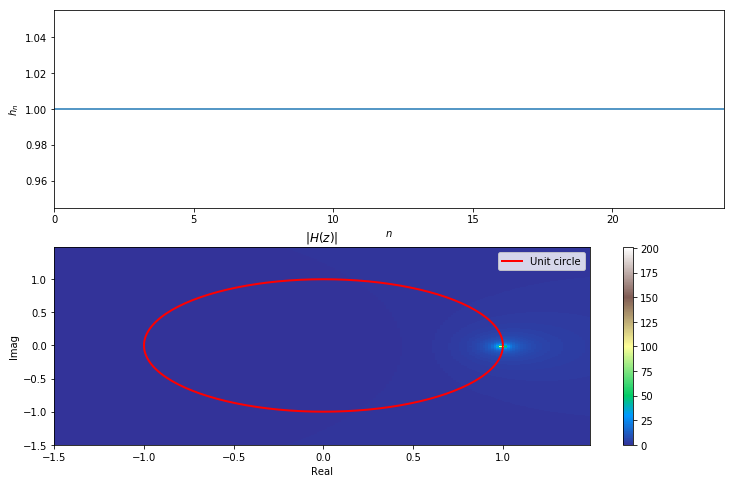

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(samplingIndices, impulseResponse)
plt.xlabel('$n$'), plt.ylabel('$h_n$'), plt.xlim((samplingIndices[0],samplingIndices[-1]))
plt.subplot(2,1,2)
plt.imshow(absTransferFunction, extent=[xGrid[0],xGrid[-1],yGrid[0],yGrid[-1]], aspect='auto',\
           vmin=np.min(absTransferFunction), vmax=np.max(absTransferFunction), cmap='terrain'), plt.colorbar()
plt.plot(np.real(unitCircle),np.imag(unitCircle), 'r', linewidth=2, label='Unit circle')
plt.xlabel('Real'), plt.ylabel('Imag'), plt.title('$|H(z)|$'), plt.legend();

### Poles and zeros
We can write the transfer function $H(z)$ above as the ratio between two polynomials, i.e., 
$$
    H(z) = \frac{1}{1-az^{-1}} = \frac{z}{z-a} = \frac{B(z)}{A(z)}\ .
$$

Note that
- **zeros**: the roots of the equation $B(z) = 0$ are called **zeros**
- **poles**: the roots of the equation $A(z) = 0$ are called **poles**

For the above example, $z=0$ is, therefore, a zero, and $z=a$ is a pole.

As we saw previously, a general difference equation (i.e., filtering in the time-domain)
$$
    y_n = \sum_{m=0}^q b_m x_{n-m} + \sum_{m=1}^p a_m y_{n-m}
$$
can be written in the Z-domain as
$$
    Y(z) = H(z)X(z)
$$
where
\begin{align}
    H(z) &= \frac{B(z)}{A(z)} = \frac{b_0+b_1z^{-1}+\cdots+b_qz^{-q}}{1-a_1z^{-1}-\cdots-a_pz^{-p}}\\
    &= \frac{z^{p}}{z^{q}}\frac{b_0z^q+b_1z^{q-1}+\cdots+b_q}{z^p-a_1z^{p-1}-\cdots-a_p}\ .
\end{align}

To compute the **zeros** of $H(z)$, we have to solve
$$
    B(z) = 0\ .
$$

To compute the **poles** of $H(z)$, we have to solve
$$
    A(z) = 0\ .
$$

#### Pole-zero map
A pole-zero map is the complex plane containing
- the unit circle
- all zeros as a **circle** ('o')
- all poles as a **cross** ('x')

<center>
<img src="figures/ap6PzSketch.png" alt="Poles and zeros" width="60%"/>
</center>

#### Filter stability
- **Time-domain**: A filter is said to be **stable** when its impulse response goes to zero for an increasing $n$
- **Z-domain**: A filter is said to be **stable** if **all poles are within the unit circle**!

Which one of these filters are stable?
<center>
<img src="figures/ap6AreTheseStable.png" alt="Various pole zero plots" width="70%"/>
</center>

### Summary
1. The transfer function of a filter can be written as
$$
    H(z) = \frac{B(z)}{A(z)} = \frac{b_0+b_1z^{-1}+\cdots+b_qz^{-q}}{1-a_1z^{-1}-\cdots-a_pz^{-p}}\ .
$$
2. The solutions to the equation $B(z) = 0$ are called **zeros**
3. The solutions to the equation $A(z) = 0$ are called **poles**
4. A pole-zero plot shows graphically the position of the zeros and poles in the complex plane
5. If all roots are inside the unit circle, the filter is stable

### Active 5 minutes break
Consider the filter with difference equation
$$
    y_n = 2x_n-x_{n-1}  + 2y_{n-1}-2y_{n-2}\ .
$$
1. Is the filter a feedforward or a feedback filter?
2. Compute the transfer function $H(z)$ of the filter.
3. Compute the poles and zeros and sketch them in a pole-zero plot. Is the filter stable?

---

Tip: A transfer function can be written as
$$
    H(z) = \frac{B(z)}{A(z)} = \frac{b_0+b_1z^{-1}+\cdots+b_qz^{-q}}{1-a_1z^{-1}-\cdots-a_pz^{-p}}\ .
$$

## Filter properties and types
In the next 20 minutes, you will learn
- how you can rearrange filters
- the four basic filter types

### Linearity of filters
Filters are so-called **linear tranforms** since they satisfy the following two properties
1. Homogenity
2. Additivity

#### Homogenity
In a homogeneous system, we obtain the same result by scaling a signal before or after we filter it, i.e.,
$$
    (aX(z))H(z) = aY(z)
$$
if $Y(z) = X(z)H(z)$.
<center>
<img src="figures/Xz_a_Hz_Yz_and_Xz_Hz_a_Yz.png" alt="Homogenity" width="70%"/>
</center>

#### Additivity
In a additive system, we obtain the same filter output by adding two input signals before filtering or by summing the filtered versions of these two input signals, i.e.,
\begin{align}
    Y(z) &= H(z) X(z) = H(z)(X_1(z)+X_2(z)) = H(z)X_1(z)+H(z)X_2(z)
\end{align}
if $X(z) = X_1(z)+X_2(z)$.
<center>
<img src="figures/additivity_of_signals.png" alt="Additivity" width="50%"/>
</center>

### Filters in series
The filter order does not matter since
$$
    Y(z) = F(z)G(z)X(z) = G(z)F(z)X(z)\ .
$$
<center>
<img src="figures/equivalent_systems.png" alt="Filters in series" width="60%"/>
</center>


### Filters in parallel
If we are filtering the same filter through two different **parallel** filters, we obtain
$$
    Y(z) = F(z)X(z) + G(z)X(z) = (G(z)+F(z))X(z)\ .
$$
<center>
<img src="figures/filters_in_parallel.png" alt="Parallel filters" width="60%"/>
</center>

### Basic filter types
There are **four** basic, ideal filter types
1. **Lowpass filter**: only low frequencies will pass the filter
2. **Highpass filter**: only high frequencies will pass the filter
3. **Bandpass filter**: only frequencies in a certain band will pass the filter
4. **Bandstop filter**: only frequenceies outside a certain bain will pass the filter (also sometimes called a **notch filter**)

<center>
<img src="figures/pass_filters_together.png" alt="Filter types" width="70%"/>
</center>

### Summary
1. Filters are linear
2. The order in which you filter things does not matter
3. The Z-transform makes it easy to analyse what happens when we combine filters in different filters
4. There are four main filter types which are the 
 1. **lowpass filter**
 2. **highpass filter**
 3. **bandpass filter**
 4. **bandstop filter** (also sometimes called a **notch filter**)